In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Salary_Data (1).csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

# EDA and Data Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


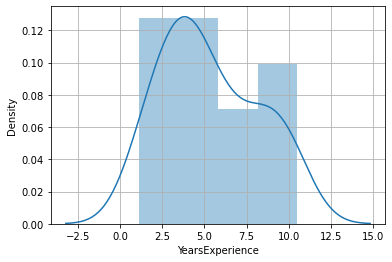

In [6]:
sns.distplot(df.YearsExperience)
plt.grid()
plt.show()

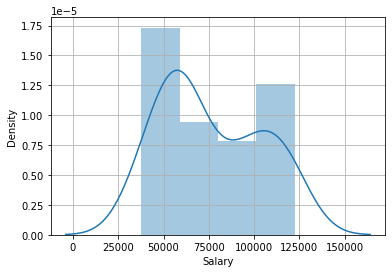

In [7]:
sns.distplot(df.Salary)
plt.grid()
plt.show()

In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


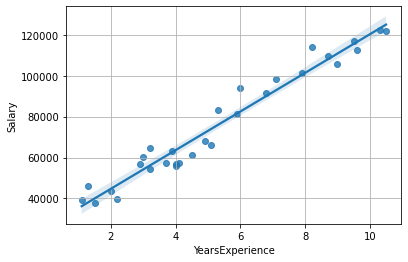

In [9]:
sns.regplot(x = df.YearsExperience, y=df.Salary)
plt.grid()
plt.show()

# MODEL BUILDING

In [10]:
import statsmodels.formula.api as smf

In [11]:
model = smf.ols('Salary~YearsExperience',data=df).fit()

# MODEL TESTING

In [12]:
# finding coefficient Parameters

model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [14]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [15]:
# finding R-squared Values
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# MODEL PREDICTION 

In [16]:
# prediction for the year 3 & 5 year of the experience

In [17]:
new_data = pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [18]:
pred_data = pd.DataFrame(data=new_data, columns=['YearsExperience'])
pred_data

,YearsExperience
0,3
1,5


In [19]:
model.predict(pred_data)

0    54142.087163
1    73042.011806
dtype: float64